# Wir trainieren nur bergab?

## Das Problem der Regression
Bei der Regressionsanalyse muss eine Modellfunktion gefunden werden, die zu einem gegebenen Satz von Datenpunkten N möglichst **genau** passt. Ein häufig verwendetes Maß für die Genauigkeit der Approximation ist die **Methode der kleinsten Quadrate** (engl. least squares approach). Der vertikale Abstand zwischen jedem Datenpunkt $(x_n,y_n)$ und der Ausgabe der Modellfunktion $m(x_n)$ wird durch Subtraktion der y-Werte der Datenpunkte von den vorhergesagten y-Werten der Modellfunktion berechnet (3).

\begin{align}
d_n & = m(x_n)-y_n \;\;\;\;\;\;\;\;\;\;\;        (3)
\end{align}

Diese Abstände werden dann quadriert und aufsummiert. Da wir die Qualität einer Approximation mit anderen Approximationen vergleichen wollen, die möglicherweise eine andere Anzahl von Datenpunkten haben, teilen wir die Summe noch durch die Gesamtzahl der Datenpunkte (**mittlerer quadratischer Fehler**). So erhalten wir unsere **Verlust**-Funktion (4). Unser Ziel ist es, diese Metrik so niedrig wie möglich zu halten, denn je niedriger der Verlust, desto besser die Approximation. Hier haben die Begriffe "Verlust" und "Fehler" die gleiche Bedeutung. Ein anderer häufig verwendeter Begriff ist "Kosten".

\begin{align}
Verlust & = \frac{1}{N} \sum_{n=0}^{N-1} {[m(x_n)-y_n]}^2 \;\;\;\;\;\;\;\;\;\;\;\; (4)
\end{align}


<div class="alert alert-block alert-info">
<b>Hinweis:</b> Beachten Sie, dass in Gl.(4) $x_0$ kein Merkmal wie in Gl.(1) aus W4V2 ist, sondern ein Datenpunkt des Datensatzes.   

</div>




Wenn wir eine genaue Regression erreicht haben, können wir damit **Vorhersagen** machen. Wir werden unsere Neuronen auf einen gegebenen Satz von Punkten trainieren und sie dann verwenden, um neue Punkte vorherzusagen. Dazu werden wir dem trainierten Neuron neue x-Werte geben, zu denen es die y-Werte vorhersagen soll.


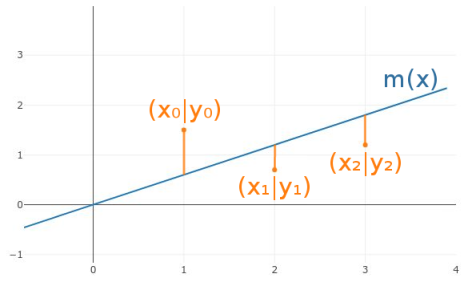
<p style="text-align: center;">
    Abb. 3 - Visualisierung des Abstands zur Modellfunktion
</p>





In [ ]:
# do not change
class SimpleNeuron:
    def __init__(self, plot):
        self.plot = plot #I am assigned the following plot
        self.plot.register_neuron(self) #hey plot, remember me

    def set_values(self, weight:float, bias:float):
        self.weight = weight
        self.bias = bias
        self.plot.update() #hey plot, I have changed, redraw my output

    def get_weight(self) -> float:
        return self.weight

    def get_bias(self) -> float:
        return self.bias

    def compute(self, x:float) -> float:
        self.activation = self.weight * x + self.bias
        return self.activation

Wir werden eine Funktion "loss" erstellen, die die Operation in Gleichung (4) durchführt. Als Argumente wird sie dazu ein Neuron-Objekt und einen Satz von Punkten erhalten.
- Für jeden Punkt, den wir ihr geben, trennt sie zunächst x- und y-Werte.
- Dann übergibt sie dem Neuron einen x-Wert und bittet das Neuron, eine Vorhersage für den y-Wert zu berechnen. (siehe $m(x_n)$)
- Dann subtrahiert sie den realen y-Wert von dem vorhergesagten y-Wert, wie in Gleichung (3), und erhält einen Abstand
- Anschließend quadriert sie den Abstand und summiert die quadrierten Abstände.  
- Im letzten Schritt wird die Summe der quadrierten Abstände durch die Anzahl der verglichenen Punkte dividiert.

Führen Sie die nachfolgende Zelle aus, um eine Verlustfunktion zu definieren.

In [ ]:
# do not change
def loss(neuron:SimpleNeuron, points:dict) -> float:
    sum_squared_dist = 0

    for point_x, point_y in zip(points["x"], points["y"]):  # zip merges both points["x"] and points["y"]

        predicted_point_y = neuron.compute(point_x)
        dist = point_y - predicted_point_y
        squared_dist = dist ** 2
        sum_squared_dist += squared_dist

    loss = sum_squared_dist / len(points["y"])
    return loss

### Vorbereiten eines interaktiven Plots

Nachdem wir die notwendigen Bibliotheken importiert haben, werden wir nun eine interaktive Plot-Klasse einrichten. Diese soll die Ausgabe eines Neurons zeichnen, indem sie es auffordert, einen Satz von x-Werten zu berechnen. Das führt zu einem Satz von vorhergesagten y-Werten, die auf einer Ebene gezeichnet werden können. Wenn das Gewicht oder der Bias eines Neurons geändert wird, ruft das Neuron die "redraw"-Methode seines Plots auf, um ihn zu aktualisieren. Der Plot kann auch feste Punkte zeichnen. Interaktive Schieberegler werden verwendet, um die Gewichte und den Bias der Neuronenobjekten direkt zu ändern.


<div class="alert alert-block alert-info">
<b>Hinweis:</b> Die Plot-Klassen sind nicht Teil des Lernstoffs für dieses Praktikum.  

</div>

Führen Sie die nachfolgenden Zellen aus, um die Bibliotheken zu importieren und einen interaktiven Plot zu definieren.

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Wechseln Sie in die tf1-Umgebung. Wenn Sie einen eigenen Rechner verwenden oder diese Environment kein Plotly enthält, <a href="https://anaconda.org/plotly/plotly">installieren</a> Sie es. Dazu öffnen Sie das Terminal in tf1 und verwenden conda install ...

</div>

In [ ]:
# do not change
import numpy as np
import plotly.offline as plotly
import plotly.graph_objs as go
from ipywidgets import interact, Layout, HBox, FloatSlider
import time
import threading

In [ ]:
# do not change
# an Interactive Plot monitors the activation of a neuron or a neural network
class Interactive2DPlot:
    def __init__(self, points:dict, ranges:dict, width:int=800, height:int=400, margin:dict=dict(t=0, l=170), draw_time:float=0.05):
        self.idle = True
        self.points = points
        self.x = np.arange(ranges["x"][0], ranges["x"][1], 0.1)
        self.y = np.arange(ranges["y"][0], ranges["y"][1], 0.1)
        self.draw_time = draw_time
        self.layout = go.Layout(
            xaxis=dict(title="Input: x", range=ranges["x"], fixedrange=True),
            yaxis=dict(title="Output: y", range=ranges["y"], fixedrange=True),
            width=width,
            height=height,
            showlegend=False,
            autosize=False,
            margin=margin,
        )
        self.trace = go.Scatter(x=self.x, y=self.y)
        self.plot_points = go.Scatter(x=points["x"], y=points["y"], mode="markers")
        self.data = [self.trace, self.plot_points]
        self.plot = go.FigureWidget(self.data, self.layout)
        # self.plot = plotly.iplot(self.data, self.layout,config={"displayModeBar": False})

    def register_neuron(self, neuron:SimpleNeuron):
        self.neuron = neuron

    def redraw(self):
        self.idle = False
        time.sleep(self.draw_time)
        self.plot.data[0].y = self.neuron.compute(self.x)
        self.idle = True

    def update(self):
        print("Loss: {:0.2f}".format(loss(self.neuron, self.points)))
        if self.idle:
            thread = threading.Thread(target=self.redraw)
            thread.start()

<div class="alert alert-block alert-success">
<b>Aufgabe 4.2.1:</b> Das Neuron trainieren
<ul>
<li>Sie erhalten einen Satz mit 3 Punkten und ein Neuron, um eine Kurvenanpassung durchzuführen. Führen Sie die folgende Zelle aus.
<li> <b>Verändern Sie das Gewicht und den Bias des Neurons mit den Schiebereglern, um den Verlust zu minimieren.</b>
    <li><b>Tipp:</b> Sie können die Schieberegler auch mit den Pfeiltasten auf Ihrer Tastatur verändern, nachdem Sie auf den Schieberegler geklickt haben.
</ul>
</div>

In [ ]:
# do not change
points_linreg = dict(x=[1, 2, 3], y=[1.5, 0.7, 1.2])
ranges_linreg = dict(x=[-4, 4], y=[-4, 4])

linreg_plot = Interactive2DPlot(points_linreg, ranges_linreg)
simple_neuron = SimpleNeuron(linreg_plot)

slider_layout = Layout(width="90%")

interact(
    simple_neuron.set_values,
    weight=FloatSlider(min=-3, max=3, step=0.1, value = 0, layout=slider_layout),
    bias=FloatSlider(min=-3, max=3, step=0.1, value = 0, layout=slider_layout)
)

linreg_plot.plot

<div class="alert alert-block alert-success">
<b>Frage 4.2.2:</b> Was ist die optimale Kombination aus Gewicht und Bias?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>

### Vorbereiten des 3D-Plots
Wir sehen, dass die Suche nach dem geringsten Verlust ein **Parameteroptimierungsproblem** ist. Bisher können wir das Problem manuell lösen. Wollen wir aber neuronale Netze zur Lösung komplexerer Probleme verwenden, müssen wir einen Weg finden, diesen Prozess zu automatisieren.

Die Verlustfunktion wird sowohl mit dem festgelegten Gewicht als auch mit dem festgelegten Bias geändert. Diese Beziehung kann dreidimensional visualisiert werden, was uns weitere Einblicke geben kann, um einen Algorithmus zu konstruieren, der das Optimierungsproblem löst.
In dieser 3D-Ansicht werden logarithmische Skalen verwendet, um die Topographie hervorzuheben. Wir werden eine neue Funktion definieren, um den logarithmischen Verlust für einen Satz von Punkten zu berechnen.

Der Plot wird wie folgt definiert:
- Die **X-Achse** stellt die Gewichte dar.
- Die **Y-Achse** stellt den Bias dar.
- Die **Z-Achse** (Höhe) stellt den entsprechenden Verlustwert bei einer gegebenen Gewicht/Bias-Konfiguration dar. Zur besseren Verständlichkeit wird der Logarithmus des MSE-Verlusts angezeigt.
- Die **schwarze Kugel** stellt die aktuelle Gewicht/Bias-Konfiguration. Seine Höhe zeigt den Verlust dieser Konfiguration an.

Führen Sie die folgenden Zellen aus.

In [ ]:
# do not change
def log_mse(neuron:SimpleNeuron, points:dict) -> float:
    least_squares_loss = loss(neuron, points)
    return np.log10(least_squares_loss)

In [ ]:
# do not change
class Interactive3DPlot:
    def __init__(self, points:dict, ranges:dict, width:int=600, height:int=600, draw_time:int=0.1):
        self.idle = True
        self.points = points
        self.draw_time = draw_time
        self.threading = threading

        self.range_weights = np.arange(  # Array with all possible weight values in the given range
            ranges["x"][0], ranges["x"][1], 0.1
        )
        self.range_biases = np.arange(  # Array with all possible bias values in the given range
            ranges["y"][0], ranges["y"][1], 0.1
        )
        self.range_biases_t = self.range_biases[:, np.newaxis]  # Bias array transposed
        self.range_losses = []  # initialize z axis for 3D surface

        self.ball = go.Scatter3d(  # initialize ball
            x=[], y=[], z=[], hoverinfo="none", mode="markers", marker=dict(size=12, color="black")
        )

        self.layout = go.Layout(
            width=width,
            height=height,
            showlegend=False,
            autosize=False,
            margin=dict(t=0, l=0),
            scene=dict(
                xaxis=dict(title="Weight", range=ranges["x"], autorange=False, showticklabels=True),
                yaxis=dict(title="Bias", range=ranges["y"], autorange=False, showticklabels=True),
                zaxis=dict(title="Loss: log(MSE)", range=ranges["z"], autorange=True, showticklabels=False),
            ),
        )

        self.data = [
            go.Surface(
                z=self.range_losses,
                x=self.range_weights,
                y=self.range_biases,
                colorscale="Viridis",
                opacity=0.9,
                showscale=False,
                hoverinfo="none",
            ),
            self.ball,
        ]

        self.plot = go.FigureWidget(self.data, self.layout)

    def register_neuron(self, neuron:SimpleNeuron):
        self.neuron = neuron
        self.calc_surface()

        # height of 3d surface represents loss of weight/bias combination
        # In the 2D plot, x is an array from e.g. -4 to +4. But the weights and biases only have a single value
        # Here x will be the points to do regression and to calculate the loss on.
        # The surface is spanned by the arrays of weight and bias.

    def calc_surface(self):

        self.neuron.weight = (  #instead of 1 weight and 1 bias, let Neuron have an array of all weights and biases
            self.range_weights
        )
        self.neuron.bias = self.range_biases_t
        self.range_losses = log_mse(  # result: matrix of losses of all weight/bias combinations in the given range
            self.neuron, self.points
        )
        self.plot.data[0].z = self.range_losses

    def update(self):
        if self.idle:
            thread = threading.Thread(target=self.redraw)
            thread.start()

    def redraw(self):  # when updating, only the ball is redrawn
        self.idle = False
        time.sleep(self.draw_time)
        self.ball.x = [self.neuron.weight]
        self.ball.y = [self.neuron.bias]
        self.ball.z = [log_mse(self.neuron, self.points)]
        self.plot.data[1].x = self.ball.x
        self.plot.data[1].y = self.ball.y
        self.plot.data[1].z = self.ball.z
        self.idle = True

In [ ]:
# do not change
class DualPlot:
    def __init__(self, points:dict, ranges_3d:dict, ranges_2d:dict):
        self.plot_3d = Interactive3DPlot(points, ranges_3d)
        self.plot_2d = Interactive2DPlot(points, ranges_2d, width=400, height=500, margin=dict(t=200, l=30))

    def register_neuron(self, neuron:SimpleNeuron):
        self.plot_3d.register_neuron(neuron)
        self.plot_2d.register_neuron(neuron)

    def update(self):
        self.plot_3d.update()
        self.plot_2d.update()

<div class="alert alert-block alert-success">
<b>Aufgabe 4.2.3:</b> Das Neuron trainieren
<ul>
<li> Sie erhalten den gleiche Satz von 3 Datenpunkten und erneut ein Neuron, um eine Kurvenanpassung durchzuführen. Führen Sie die folgende Zelle aus.
<li> <b>Verändern Sie das Gewicht und den Bias des Neurons mit den Schiebereglern, um den Verlust zu minimieren.</b>
<li> <b>Beobachten Sie alle Änderungen.</b>
    </li>

</ul>

</div>

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Sie können den 3D-Plot drehen, indem Sie auf ihn klicken und den Cursor bewegen. Dabei müssen Sie mit dem Cursor innerhalb des Widgets bleiben.

</div>

In [ ]:
# do not change
ranges_3d = dict(x=[-2.5, 2.5], y=[-2.5, 2.5], z=[-1, 2.5])  # set up ranges for the 3d plot
plot_task2 = DualPlot(points_linreg, ranges_3d, ranges_linreg)  # create a DualPlot object to mange plotting on two plots
neuron_task2 = SimpleNeuron(plot_task2)  # create a new neuron for this task

interact(
    neuron_task2.set_values,
    weight=FloatSlider(min=-2, max=2, step=0.2, layout=slider_layout),
    bias=FloatSlider(min=-2, max=2, step=0.2, layout=slider_layout),
)

HBox((plot_task2.plot_3d.plot, plot_task2.plot_2d.plot))

<div class="alert alert-block alert-success">
<b>Frage 4.2.4:</b> Wo liegt im Allgemeinen die optimale Kombination aus Gewicht und Bias im 3D-Plot?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>

<div class="alert alert-block alert-success">
<b>Frage 4.2.5:</b> Wie steil ist das Tal an der Stelle der optimalen Gewichts- und Bias Kombination?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>

***
## Aktivierungsfunktionen
Bis jetzt ist unser Neuronenmodell, das aus Gewichten und Bias besteht, nur in der Lage, lineare Funktionen zu imitieren. Folglich können wir damit nur lineare Regression durchführen. Aktivierungsfunktionen erweitern unsere Möglichkeiten, indem sie dem Neuron eine zusätzliche Nichtlinearität hinzufügen. Mit ihnen können wir komplexere Funktionen modellieren. Die heutzutage am häufigsten verwendete Aktivierungsfunktion ist die Rectified Linear Unit, auch **ReLU** genannt. Sie gibt nur den Eingabewert aus, solange er größer als 0 ist. Ist er kleiner als 0, gibt sie 0 aus. Wir können diese Funktion bequem beschreiben, indem wir das Maximum des Eingabewertes und 0 nehmen. Der größere Wert von beiden wird als Ausgabe gewählt (5).

\begin{align}
f_{relu}(x) & = max(0,x) \;\;\;\;\;\;\;\;\;\;\; (5)
\end{align}




Führen Sie die folgende Zelle aus, um die ReLU Funktion zu definieren.

In [ ]:
# do not change
def relu(input_val:float) -> float:
    return np.where(input_val > 0, input_val, 0.0)

Wir können ein Neuron mit einer ReLU-Aktivierungsfunktion folgendermaßen zeichnen:
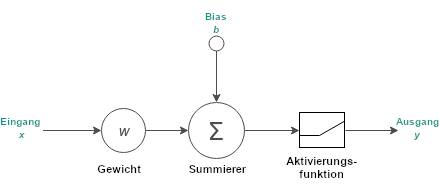
<p style="text-align: center;">
    Abb. 5 - Neuron mit ReLU-Aktivierungsfunktion visualisiert
</p>
Lassen Sie uns eine neue Klasse erstellen, um dieses Neuron in Python zu implementieren. Wir werden alle Eigenschaften eines Neurons von SimpleNeuron erben.
Wir ändern nur die Ausgabe, indem wir sie zunächst durch unsere ReLU-Funktion führen:
<div class="alert alert-block alert-success">
<b>Aufgabe 4.2.6:</b> Implementieren Sie ein komplettes künstlichen Neurons mit ReLU-Aktivierungsfunktion
<ul>
<li> Vervollständigen Sie den folgenden Code eines künstliches Neuron, indem Sie die ReLU-Funktion von oben verwenden, um seine Aktivierung zu berechnen (wie in Abbildung 5). </li>
<li>Schauen Sie sich die <a href="#simple_neuron">einfache Neuronenklasse</a> an und schreiben Sie eine ähnliche Berechnungsfunktion</li>
<li>Sie brauchen die relu-Funktion nicht neu zu implementieren und sollten nicht mehr als 1 Zeile hinzufügen müssen. </li>

</ul>
</div>

In [ ]:
class ReluNeuron(SimpleNeuron): #inherit from SimpleNeuron class

    def compute(self, inputs:list) -> float:
        # STUDENT CODE HERE

        # STUDENT CODE until HERE
        return self.activation

***
### Aufgabe: Nichtlineare Klimaregelung

Sie finden sich als Ingenieur bei der Firma "ClimaTronics" wieder. Ihre Firma möchte KI-Technologie implementieren, um ihr neues Klimasystem "Perfect Climate 9000" zu regeln. Obwohl das Problem leicht mit konventioneller Programmierung gelöst werden kann, möchte die Geschäftsleitung, dass Sie KI implementieren, um Investoren zu gewinnen. Sie müssen die folgenden Anforderungen erfüllen, die im Datenblattauszug visualisiert sind:


`Bei Temperaturen unter 25°C soll die Klimasteuerung ausgeschaltet bleiben. Bei einer Temperatur von 30°C soll sie 10% ihrer Kühlleistung erreichen. Zwischen 30°C und 40°C soll die Kühlleistung quadratisch mit der Temperatur ansteigen. Die Kühlleistung soll bei 40°C ihr Maximum erreichen.`
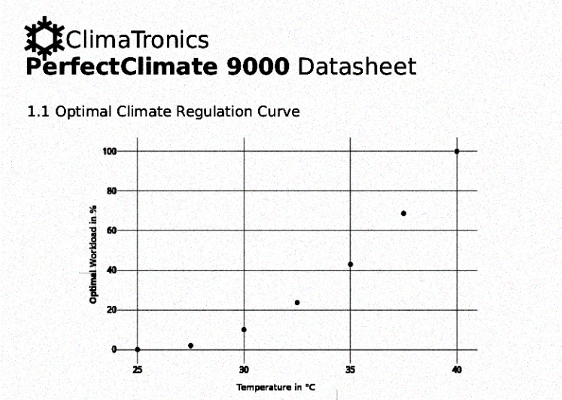<img src="images/datasheet.png" />



Führen Sie die nachfolgende Zelle aus, um ein interaktives Diagramm anzuzeigen.

In [ ]:
# do not change
points_climate = dict(x=[25.0, 27.5, 30.0, 32.5, 35, 37.5, 40.0], y=[0.0, 2.0, 10.0, 23.7, 43, 68.7, 100.0])

ranges_climate = dict(x=[-4, 45], y=[-4, 105])
climate_plot = Interactive2DPlot(points_climate, ranges_climate)
our_relu_neuron = ReluNeuron(climate_plot)

interact(
    our_relu_neuron.set_values,
    weight=FloatSlider(min=-10, max=10, step=0.1, value=0, layout=slider_layout),
    bias=FloatSlider(min=-200.0, max=200.0, step=1, value=0, layout=slider_layout),
)

climate_plot.plot

<div class="alert alert-block alert-success">
<b>Frage 4.2.7:</b> Wie wirkt sich eine Änderung des Gewichts auf die Ausgabefunktion aus, wenn der Bias auf 0,00 gesetzt wird?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>

<div class="alert alert-block alert-success">
<b>Frage 4.2.8:</b> Wie wirkt sich die Änderung des Bias auf die Ausgangsfunktion aus?
</div>

<div class="alert block alert-success">
<b>Ihre Antwort:</b></div>

<div class="alert alert-block alert-success">
<b>Frage 4.2.9:</b> Bei welcher Temperatur beginnt die Klimatisierung, wenn sie das Gewicht auf 1,00 und den Bias auf -10, setzen?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>

<div class="alert alert-block alert-success">
<b>Frage 4.2.10:</b> Bei welcher Temperatur beginnt die Klimatisierung, wenn Sie das Gewicht auf 1,00 und den Bias auf -20 setzen?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>

<div class="alert alert-block alert-success">
<b>Frage 4.2.11:</b> Bei welcher Temperatur beginnt die Klimatisierung, wenn Sie das Gewicht auf 2,00 und des Bias auf -20 setzen?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>

<div class="alert alert-block alert-success">
<b>Frage 4.2.12:</b> Was ist die beste Gewicht/Bias-Konfiguration, die Sie finden konnten?
</div>

<div class="alert block alert-success">
<b>Ihre Antwort:</b></div>

### Schlussfolgerung
Mit nur einem Neuron können wir den Einfluss von Gewicht und Bias leicht verstehen und nachvollziehen.
Aber unsere Ein-Neuron-Approximation reicht nicht aus, um die benötigte quadratische Beziehung genau zu approximieren.

***
## Neuronale Netze

Die Approximation kann durch die Verwendung mehrerer Neuronen verbessert werden. Anstatt nur ein Neuron für unsere Approximation zu verwenden, konstruieren wir ein neuronales Netzwerk. Wir werden zwei ReLU-Neuronen und ein Ausgangsneuron verwenden, das ebenfalls Gewichte hat. Nun können wir entscheiden, wie wir das Ergebnis der beiden ReLU-Neuronen in der Mitte gewichten wollen.

### Versteckte Schichten (engl. Hidden Layers)
In dem nachfolgenden neuronalen Netzwerk stellen die beiden Neuronen in der Mitte eine **versteckte Schicht** dar.

In der letzten Aufgabe hatten das Gewicht und der Bias einen leicht nachvollziehbaren Einfluss auf die Ausgabe.
Durch das Hinzufügen weiterer Neuronen wird die Beziehung zwischen den einzelnen Gewichten und Bias und der Ausgabe jedoch weniger nachvollziehbar.
Wir erhalten die Gewichte und Bias, indem wir sie einfach solange anpassen, bis das Ergebnis stimmt. Bei diesem Vorgang verlieren wir schnell den Überblick darüber, was wir eigentlich genau berechnen. Daher ist es schwierig, ein einzelnes Neuron aus diesem Netz zu isolieren und seine Verantwortung im System zu beschreiben.

Der Eingabewert wird mit den ersten Gewichten multipliziert und nach dem Hinzufügen der Bias auf eine Aktivierungsfunktion gegeben. Anschließend wird dieser Ausgang mit den zweiten Gewichten multipliziert. Versteckte Schichten können mehrfach hintereinander gestapelt werden. Dies gibt Raum für mehrere Berechnungsschritte und ermöglicht die Approximation komplexerer Funktionen.

Neuronale Netze, die mindestens eine versteckte Schicht verwenden, haben eine interessante Eigenschaft: Sie können zur Approximation einer beliebigen stetigen Funktion verwendet werden. _(Siehe "Weiterführende Literatur")_

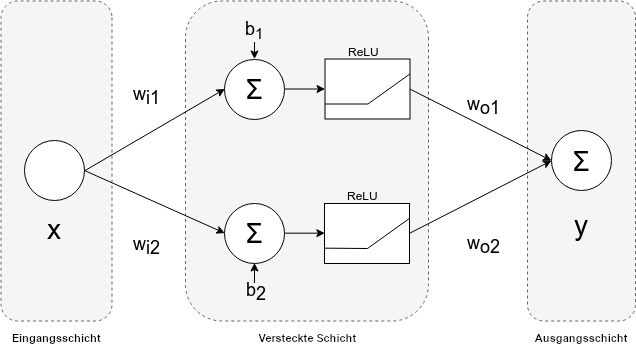<img src="images/hidden_layer.png" />



Wir werden eine Klasse für neuronale Netze erstellen. Das Netzwerk wird vier Gewichte und zwei Bias haben.

</div>

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Der Einfachheit halber und zur Wiederverwendbarkeit des Codes werden wir neuronale Netze so behandeln, wie wir einzelne Neuronen in den bisherigen Beispielen behandelt haben. Denken Sie daran, dass ein künstliches Neuron nur eine mathematische Funktion ist. Ein ganzes neuronales Netzwerk kann auch vollständig durch eine einzelne Funktion beschrieben werden, wie es auch bei der Berechnung der Aktivierung geschieht. Die Neuronen müssen nicht die konkrete Form von einzelnen Datenobjekten annehmen.

</div>

Führen Sie die folgende Zelle aus, um ein neuronales Netzwerk zu definieren.

In [ ]:
# do not change
class NeuralNetwork:
    def __init__(self, plot):
        self.plot = plot #I am assigned the following plot
        self.plot.register_neuron(self) #hey plot, remember me

    def set_config(self, w_i1:float, w_o1:float, b1:float, w_i2:float, w_o2:float, b2:float):
        self.w_i1 = w_i1
        self.w_o1 = w_o1
        self.b1 = b1
        self.w_i2 = w_i2
        self.w_o2 = w_o2
        self.b2 = b2
        self.show_config()
        self.plot.update()  # please redraw my output

    def show_config(self):
        print("w_i1:", self.w_i1, "\t| ", "w_o1:", self.w_o1,"\n")
        print("b1:", self.b1, "\t| ", "w_i2:", self.w_i2,"\n")
        print("w_o2:", self.w_o2, "\t| ", "b2:", self.b2,"\n")

    def compute(self, x:float)->float:
        self.prediction = (relu(self.w_i1 * x + self.b1) * self.w_o1
                         + relu(self.w_i2 * x + self.b2) * self.w_o2)
        return self.prediction

***
### Aufgabe: Nichtlineare Klimaregelung mit einem neuronalen Netzwerk

Führen Sie die folgende Zelle aus und passen Sie Gewichte und Bias an, um eine bessere Annäherung an die gewünschte Kurve als in der vorherigen Aufgabe zu erreichen.

In [ ]:
# do not change
climate_plot_adv = Interactive2DPlot(points_climate, ranges_climate)
our_neural_net = NeuralNetwork(climate_plot_adv)

interact(
    our_neural_net.set_config,
    w_i1=FloatSlider(min=-10, max=10, step=0.1, layout=slider_layout),
    w_o1=FloatSlider(min=-10, max=10, step=0.1,  layout=slider_layout),
    b1=FloatSlider(min=-200.0, max=200.0, step=1,  layout=slider_layout),
    w_i2=FloatSlider(min=-10, max=10, step=0.1, layout=slider_layout),
    w_o2=FloatSlider(min=-10, max=10, step=0.1,  layout=slider_layout),
    b2=FloatSlider(min=-200.0, max=200.0, step=1,layout=slider_layout),
)
climate_plot_adv.plot

<div class="alert alert-block alert-success">
<b>Frage 4.2.13:</b> Was ist die beste Konfiguration, die Sie finden konnten? (Kopie von oberhalb des Plots)
</div>

<div class="alert block alert-success">
<b>Ihre Antwort:</b></div>

### Schlussfolgerung
Wir stellen fest, dass die quadratische Beziehung durch die Verwendung zusätzlicher Gewichte und Bias besser angenähert werden kann. Mit zwei ReLU Neuronen können wir eine Funktion mit zwei Knicken erstellen.
Die Komplexität der Suche nach den optimalen Gewichten/Biases nimmt jedoch mit jeder Variablen drastisch zu. Je leistungsfähiger unsere neuronalen Netze sein sollen, desto schwieriger wird die Optimierung.

***
## Backpropagation

Die Lösung für unser Optimierungsproblem lautet Backpropagation. Mit ihr können wir den Prozess der Anpassung von Gewichten und Bias automatisieren. In diesem Beispiel werden wir zu den Grundlagen zurückkehren und ein einfaches Neuron ohne Aktivierungsfunktion betrachten. Backpropagation funktioniert unter Hinzunahme der partiellen Ableitungen der Verlustfunktion in Bezug auf jedes Gewicht und jeden Bias im Netz. Diese können mit Hilfe der Kettenregel der Infinitesimalrechnung berechnet werden. Die Ausgabe des Netzwerks $\hat{y} = \hat{f}(x,\theta )$
(wenn $\hat{y}$ den vom neuronalen Netz vorhergesagten y-Wert bezeichnet) wird in der Forwardpropagation unter Anwendung der gegebenen Rechenregeln (Multiplizieren mit Gewichten, Summieren mit Bias und Aktivierungsfunktion, bis Sie den Ausgang erreichen) berechnet. Der Verlust wird dann aus dem vorhergesagten und dem Ground-Truth-Wert (tatsächlichem Wert) mit der Verlustfunktion berechnet. Mit diesem Verlust können Sie einfach die partiellen Ableitungen in der so genannten Backpropagation berechnen. Siehe zum Beispiel: [BackpropagationExample](https://ml-cheatsheet.readthedocs.io/en/latest/backpropagation.html)

An jedem Punkt zeigen der Bias- und der Gewichtsgradient in die Richtung des höheren Verlustes. Die Größe des Gradienten repräsentiert den Betrag der Verlustzunahme.

Angenommen, wir würden den Verlust in Abb. 6 __maximieren__: Alles, was wir tun müssen, ist, den partiellen Ableitungen zu folgen, indem wir sie zu unserem aktuellen Gewicht/Bias-Punkt addieren. In diesem Beispiel bedeutet das, dass wir das Gewicht stark verringern (siehe die Achsen in Abb. 6) und den Bias um einen geringen Betrag verringern (da seine partielle Ableitung eine geringere Größe hat).

Da wir aber mit dem Verlust nach unten gehen wollen, _subtrahieren_ wir den Gradienten von unserem aktuellen Punkt. Dadurch nähern wir uns dem Minimum entgegen. Im nächsten Schritt sind wir so weiter unten und nahe dem Tiefpunkt. Da wir dann aber immer noch nicht nah genug am Tiefpunkt sind, wiederholen wir diese Schritte einfach, bis wir das Minimum erreicht haben.

Das Gute an neuronalen Netzwerken ist, dass wir den Gradienten **analytisch** für alle möglichen Datenpunkte bestimmen können. Wir müssen ihn nicht durch numerische Methoden schätzen, wie z. B. durch die Berechnung des Verlusts zweier Gewicht/Bias-Kombinationen dividiert durch den "Schrittabstand" ("Euler-Methode"). Dieses Vorwissen über den Gradienten macht die Backpropagation vergleichsweise schnell. Leider können wir aber nicht analytisch die Gewicht/Bias-Kombination bestimmen, die die Verlustfunktion auf ihr Minimum bringt. Wir müssen sie immer noch iterativ über viele Schritte finden.

Jeder Schritt, den wir machen, wird eine **Epoche** genannt. (In diesem Fall sind _Trainingsschritte_ und _Epochen_ gleichwertig). Da es schwierig ist, festzustellen, ob das Minimum erreicht ist, geben wir die Anzahl der Epochen vor unserem Abstieg an und lassen das Programm dann einfach laufen.

Ist die Größe der Gradienten zu groß, werden wir nie ein Minimum erreichen. Das liegt daran, dass unser Algorithmus die Kugel (also den aktuellen Punkt) bei jedem Schritt zu stark bewegen will. Er wird um das Minimum oszillieren, aber nie dort ankommen. Im Extremfall kann die Bewegung sogar bis in die Unendlichkeit oszillieren. Um die Kontrolle über die Größe der Bewegung zu haben, wird der Gradient mit einem Faktor multipliziert, der **Lernrate** (engl. learning rate) genannt wird (auch "Schrittgröße" genannt im Gradientenabstieg). Indem wir die Lernrate auf einen optimalen Wert einstellen, können wir Oszillationen verhindern. Ist die Lernrate allerdings zu klein, wird das Netzwerk sehr lange brauchen, um zu "lernen", da sich dann die Gewichte und Bias nur sehr langsam ändern.

Die Anzahl der Epochen sowie die Lernrate sind so genannte **Hyperparameter**. Sie beeinflussen den Trainingsprozess, sind aber nicht Teil des Netzwerks selbst.



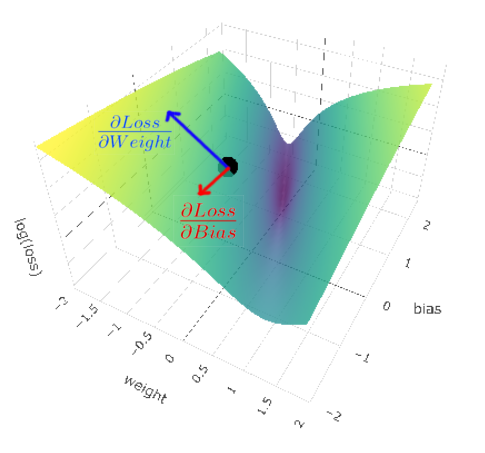<img src="images/backprop.png" />
<p style="text-align: center;">
    Abb. 6 - Partielle Ableitungen der Verlustfunktion
</p>


### Backpropagation-Plot vorbereiten
Wir werden ein neues 3D-Diagramm erstellen, das die vergangenen Gewichts-/Bias-/Verlustwerte darstellt, während wir versuchen, den Verlust Schritt für Schritt zu optimieren. Die schwarze Kugel hinterlässt eine Spur ihrer vergangenen Werte. Führen Sie die nachfolgende Zelle aus, um das Plotten der Backpropagation-Schritte zu aktivieren.

In [ ]:
# do not change
plot_backprop = DualPlot(points_linreg, ranges_3d, ranges_linreg)
trace_to_plot = go.Scatter3d(x=[], y=[], z=[], hoverinfo="none", mode="lines", line=dict(width=10, color="grey"))

plot_backprop.plot_3d.data.append(trace_to_plot)  # Expand 3D Plot to also plot traces
plot_backprop.plot_3d.plot = go.FigureWidget(plot_backprop.plot_3d.data, plot_backprop.plot_3d.layout)
plot_backprop.plot_3d.draw_time = 0


def redraw_with_traces(plot_to_update:DualPlot, neuron:SimpleNeuron, trace_list:dict, points:dict):  # executed every update step
    plot_to_update.plot_3d.plot.data[2].x = trace_list["x"]
    plot_to_update.plot_3d.plot.data[2].y = trace_list["y"]
    plot_to_update.plot_3d.plot.data[2].z = trace_list["z"]
    plot_to_update.plot_3d.plot.data[1].x = [neuron.weight]
    plot_to_update.plot_3d.plot.data[1].y = [neuron.bias]
    plot_to_update.plot_3d.plot.data[1].z = [log_mse(neuron, points)]
    plot_to_update.update()


def add_traces(neuron:SimpleNeuron, points:dict, trace_list:dict):  # executed every epoch
    trace_list["x"].extend([neuron.weight])
    trace_list["y"].extend([neuron.bias])
    trace_list["z"].extend([log_mse(neuron, points)])

***
## DIY Backpropagation

Um Backpropagation durchzuführen, müssen Sie zunächst die partiellen Ableitungen der Verlustfunktion des "einfachen Neurons" in Abhängigkeit von Gewicht und Bias bestimmen. Danach müssen Sie herausfinden, wie Sie die Gewichte und Bias richtig an den auf die Lernrate skalierten Gradienten anpassen.
Am Ende dieser Übung können Sie Ihre Ergebnisse durch Training verifizieren. Wenn Sie die erwartete Leistung (Benchmark) erreichen, ist Ihr Algorithmus korrekt.

Der Algorithmus arbeitet mit einem Dictionary von Punkten mit der Form von: [points_linreg](#points_linreg).

<div class="alert alert-block alert-success">
<b>Aufgabe 4.2.14:</b> Bestimmen Sie die Steigung <b>analytisch!!</b>
<ul>
<li> <b>Vervollständigen Sie die folgende Funktion selbst.</b>
<li>Es gibt mehrere Lösungen, Ihr Algorithmus kann das Gewicht und den Bias in die richtige Richtung anpassen, obwohl die Berechnung des Gradienten falsch ist.
<li> <b>Benchmark:</b> Wenn Sie nach 100 Epochen und mit einer Lernrate von 0,03 einen Verlust von 0,22 erreichen können, ist Ihre Lösung richtig
    </li>

</ul>

</div>

In [ ]:
def simple_neuron_loss_gradient(neuron:SimpleNeuron, points:dict)->dict:

    gradient_sum = dict(weight=0, bias=0) # contains the sum of the weight and bias gradient
    for point_x, point_y in zip(points["x"], points["y"]):  # for each point
            # Hint: point_x and point_y are the current point values

        gradient_sum["weight"] += ( # sum up the gradient for each point

            # STUDENT CODE HERE

            # STUDENT CODE until HERE
        )

        gradient_sum["bias"] += (
            # STUDENT CODE HERE

            # STUDENT CODE until HERE
        )

    gradient = dict(weight=gradient_sum["weight"] / len(points["x"]), bias=gradient_sum["bias"] / len(points["x"]))
    return gradient

<div class="alert alert-block alert-success">
<b>Aufgabe 4.2.15:</b> Das Neuron anpassen
<ul>

<li>Nachdem Sie den Gradienten ermittelt haben, müssen Sie das Gewicht und den Bias des Neurons basierend auf den partiellen Ableitungen und der Lernrate anpassen. Sie sollten Ihre Ergebnisse überprüfen, indem Sie das Netz unten trainieren.
<li> <b>Vervollständigen Sie die nachfolgende Funktion selbst.</b>
    </li>

</ul>

</div>

In [ ]:
def adjust_neuron(neuron:SimpleNeuron, gradient:dict, learning_rate:float):
    # STUDENT CODE HERE

    # STUDENT CODE until HERE

### Trainingsprozess definieren


In [ ]:
# do not change
def train(neuron:SimpleNeuron, points:dict, epochs:int, learning_rate:float, redraw_step:int, trace_list:dict):
    redraw_with_traces(neuron.plot, neuron, trace_list, points)
    for i in range(1, epochs + 1):  # first Epoch is Epoch no.1
        add_traces(neuron, points, trace_list)
        gradient = simple_neuron_loss_gradient(neuron, points)
        adjust_neuron(neuron, gradient, learning_rate)

        if i % redraw_step == 0:
            print("Epoch:{} \t".format(i), end="")
            redraw_with_traces(neuron.plot, neuron_backprop, trace_list, points)

<div class="alert alert-block alert-success">
<b>Aufgabe 4.2.16:</b> Hyperparameter wählen und trainieren
<ul>

<li>Wählen Sie eine optimale Lernrate und Anzahl der Epochen, indem Sie verschiedene Werte einstellen und die beiden nachfolgenden Zellen ausführen.</li>

</ul>

</div>

In [ ]:
learning_rate = 0.03 #keep this for benchmarking, change to play around
epochs = 100 # keep this for benchmarking, change to play around
redraw_step = 10 # update plot every n'th epoch. too slow? set this to a higher value (e.g. 100)

# these values are taken as parameters by the train function below

neuron_backprop = SimpleNeuron(plot_backprop)
HBox((plot_backprop.plot_3d.plot, plot_backprop.plot_2d.plot))

In [ ]:
#run this cell to test algorithm

np.random.seed(4) # keep this for benchmarking, remove to play around # TODO: Use np.RandomState !!!!!

neuron_backprop.set_values(  # set weight and bias randomly
    (5 * np.random.random() - 2.5), (5 * np.random.random() - 2.5)
)
trace_list1 = dict(x=[], y=[], z=[])

train(neuron_backprop, points_linreg, epochs, learning_rate, redraw_step, trace_list1)

**Benchmark:** Wenn Sie nach 100 Epochen und einer Lernrate von 0,03 einen Verlust von 0,22 erreichen können, ist Ihre Lösung korrekt.

**Beantworten Sie diese Fragen erst, wenn Ihr Algorithmus den Benchmark erreicht hat**

<div class="alert alert-block alert-success">
<b>Frage 4.2.17:</b> Was passiert, wenn Sie die Lernrate auf 0,18 setzen? Erklären Sie dieses Verhalten.
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>

<div class="alert alert-block alert-success">
<b>Frage 4.2.18:</b> Welche Lernrate führt zu dem geringsten Verlust nach 100 Epochen mit lr=0,03?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>

## Machine/Deep Learning Notation

Wir haben bereits die Lernrate, die Hyperparameter sowie die Epoche kennengelernt. Nun sollen einige weitere Begriffe eingeführt werden.

Betrachten Sie einen Trainingssatz, den Sie an Ihr neuronales Netzwerk geben und dessen Gewichte Sie mit Hilfe von Backpropagation anpassen wollen. Wenn Sie Gewichte und Bias mit jeden Datenpunkt, der in einem Vorwärts- und Rückwärtsdurchlauf verwendet wurde, aktualisieren, spricht man von **Stochastischem Gradientenabstieg** (engl. Stochastic Gradient Descent) oder Online-Lernen. Wie Sie sich vielleicht schon denken könen, können Sie auch die Fehler mehrer Datenpunkte zu Gruppen einer definierten **Stapelgröße** (engl. batch size) zusammen addieren. Auf diese Weise können Sie mehrere Rückwärtsdurchläufe mit diesen größeren Teilmengen von Trainingsdaten durchführen. Dieses Verfahren wird **Batch Gradient Descent** genannt. Bei einer korrekten Berechnung würden Sie den gesamten Satz von Trainingsdatenpunkten für Ihre Vorwärtsdurchläufe verwenden und Fehler speichern, um ein Update zu berechnen (= regulärer Gradient Descent). Mit zunehmender Anzahl an Datenpunkten ist dies aber oft nicht mehr praktikabel, sodass hier Batch Gradient Descent und Stochastic Gradient Descent hilfreich sein können. Allerdings zeigen beide Verfahren während des Trainings unterschiedliche Auswirkungen auf das Modell.

Egal, welche Variante des Gradientenabstiegs Sie verwenden: Eine **Epoche** ist dann abgelaufen, wenn Ihre Trainingsdaten einmal vollständig zum Aktualisieren der Gewichte (in Teilmengen oder als Ganzes) verwendet wurden.

Wie Sie bereits im Abschnitt zur Performannz Evaluierung gelernt haben, kann ein Modell in Abhängigkeit von der Komplexität des Problems/Modells und der Menge der verfügbaren Daten over- oder underfitten. Overfitting kann in neuronalen Netzen mit **Regularisierung** behoben werden. In der kommenden Einheit zu Convolutional Neural Networks werden Sie einige dieser Techniken unter Zuhilfenahme der Deeplearning-Bibliothek Keras anwenden müssen. Die gängigsten Methoden sind neben der Reduzierung der Modellkomplexität oder der Vergrößerung des Datensatzes die **L1/L2-Regularisierung** oder **Dropout**.

Wenn Sie Ihr Modell nicht richtig trainieren können, könnte dies daran liegen, dass Ihr Modell mit **Explodierenden oder verschwindenden Gradienten** (engl. Exploding or Vanishing Gradients) zu kämpfen hat. Betrachten Sie ein sehr tiefes Modell, das mehrere versteckte Schichten enthält. Durch Verwenden des Verlustes am Ausgang sollen die Parameter des gesamten Netzwerks aktualisiert werden. Da Werte $>1$, die rekursiv multipliziert werden, zu größeren Updates führen, kann das Verhalten während des Trainings instabil werden. Das Training wird die Gewichte in früheren Schichten nicht aktualisieren, wenn partielle Ableitungen $<1$ sind und über viele Schichten multipliziert werden (Vanishing Gradient). Um den letzten Fall zu verhindern, der beim regulären Training und beim Verwenden von Sigmoid-Funktionen häufiger auftritt, wird die ReLU-Aktivierungsfunktion heutzutage standardmäßig in den versteckten Schichten verwendet. Desweiteren können auch fortgeschrittenere Methoden verwendet werden, wie z. B. **Residual/Skip-Verbindungen**.

***
### Weiterführende Lektüre: Neuronale Netze sind universelle Funktionsapproximatoren

Mathematisch kann bewiesen werden, dass neuronale Netze jede kontinuierliche Funktion approximieren können, solange sie mindestens eine versteckte Schicht aufweisen, nichtlineare Aktivierungsfunktionen verwenden und eine ausreichende (aber endliche) Zahl von Neuronen der versteckten Schicht verwenden.

https://www.sciencedirect.com/science/article/pii/089360809190009T?via%3Dihub

Kurt Hornik,\
Approximation capabilities of multilayer feedforward networks,\
Neural Networks,\
Band 4, Ausgabe 2,\
1991,\
Seiten 251-257